In [ ]:
!pip install tensorflow
!pip install matplotlib

import numpy as np
from tensorflow.keras.preprocessing.image import load_img, array_to_img, ImageDataGenerator, img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os


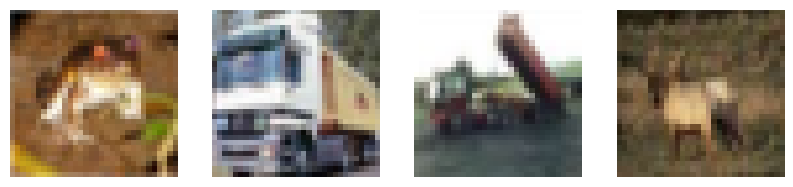

['sample_images/training_images1.jpg', 'sample_images/training_images2.jpg', 'sample_images/training_images3.jpg']


In [41]:
# save the file

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

plt.figure(figsize=(10,10))
for i in range(4):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
plt.show()

save_dir = 'sample_images'
os.makedirs(save_dir, exist_ok=True)

image_paths =[]
for i in range(3):
  img = array_to_img(x_train[i])
  image_path = os.path.join(save_dir, f'training_images{i+1}.jpg')
  img.save(image_path)
  image_paths.append(image_path)

print(image_paths)




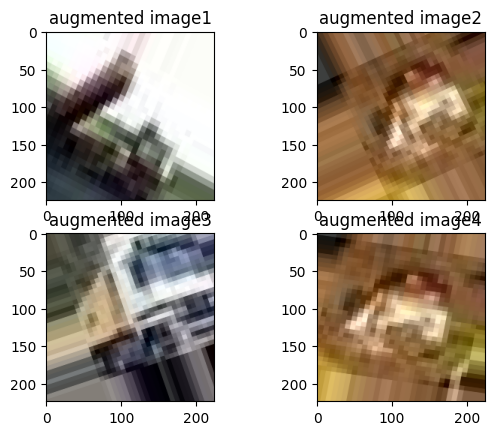

In [36]:
# 이미지 증강 설정
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

training_images =[]
for path in image_paths:
    img = load_img(path, target_size=(224, 224))
    img_array = img_to_array(img)
    training_images.append(img_array)

training_images = np.array(training_images)

# generate and visualise augmented image
i=0
for batch in datagen.flow(training_images, batch_size=1):
  plt.subplot(2,2,i+1)
  imgplot = plt.imshow(array_to_img(batch[0]))
  plt.title(f'augmented image{i+1}')
  i+=1
  if i %4 ==0:
    break
plt.show()


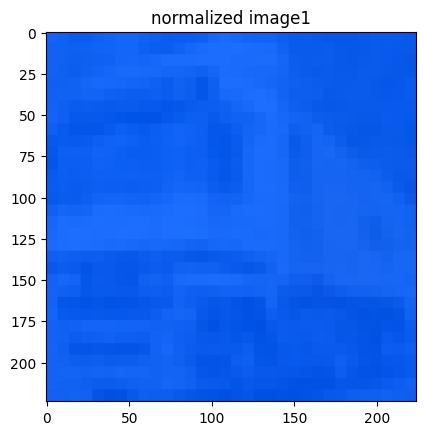

In [43]:
# different augmentation
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    samplewise_center=True,
    samplewise_std_normalization=True,
)

datagen.fit(training_images)

i=0
for batch in datagen.flow(training_images, batch_size=1):
  plt.figure(1)
  imgplot = plt.imshow(array_to_img(batch[0]))
  plt.title(f'normalized image{i+1}')
  if i %4 ==0:
    break
plt.show()


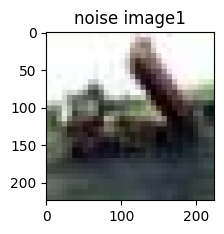

In [42]:
# custom data augmentation
def add_to_noise(image):
  noise = np.random.normal(0,0.1,image.shape)
  return image + noise

datagen = ImageDataGenerator(preprocessing_function=add_to_noise)

i=0
for batch in datagen.flow(training_images,batch_size=1):
  plt.subplot(2,2,i+1)
  imgplot = plt.imshow(array_to_img(batch[0]))
  plt.title(f'noise image{i+1}')
  if i %4 ==0:
    break
plt.show()